In [2]:
from statsmodels.tsa.arima.model import ARIMA
import sys

sys.path.append("../..")

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gp
import seaborn as sns
import sklearn

import src.datasets.loading.ookla
import src.datasets.loading.statcan
import src.datasets.joins

from src.config import DATA_DIRECTORY
import warnings

warnings.filterwarnings('ignore')

In [3]:
das_info = gp.read_file(DATA_DIRECTORY / "hackathon" / "geometry.gpkg", driver="GPKG")
speed_data = pd.read_csv(DATA_DIRECTORY / "hackathon" / "speeds.csv")
speed_data.DAUID = speed_data.DAUID.astype(str)

In [4]:
full_data = pd.merge(das_info, speed_data)
full_data["date"] = pd.to_datetime(
    full_data["year"].astype(str)
    + "-"
    + ((full_data["quarter"] - 1) * 3 + 1).astype(str)
    + "-01"
)

In [8]:
full_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2263560 entries, 0 to 2263559
Data columns (total 63 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   DAUID                              object        
 1   PRUID                              object        
 2   PRNAME                             object        
 3   CDUID                              object        
 4   CDNAME                             object        
 5   CDTYPE                             object        
 6   CCSUID                             object        
 7   CCSNAME                            object        
 8   CSDUID                             object        
 9   CSDNAME                            object        
 10  CSDTYPE                            object        
 11  ERUID                              object        
 12  ERNAME                             object        
 13  SACCODE                            object        

In [23]:
selected_df = full_data[['PCCLASS','CENSUS_YEAR','Pop_2021','Private_Dwellings','Pop_density_square_km',
                          'Land_area_square_km','Income_count_total','Median_income_count','Median_income',
                         'After-tax_income-count','After-tax_income','Income_count_25_percent','Mean_income_count','Mean_income',
                         'After-tax_mean_income_count','After-tax_mean_income','Household_income_count','Median_household_income','Median_household_after-tax_income',
                         'Indigenous_identity_count_total','Indigenous_identity_count','year',
                          'quarter', 'conn_type','tests', 'devices','avg_d_kbps','avg_u_kbps']]
# train_data = selected_data['2019-01-01':'2022-12-31']
# test_data = selected_data['2023-01-01':]
fixed_data = selected_df[selected_df['conn_type'] == 'fixed']
fixed_data.drop(columns=['conn_type'], inplace=True)
mobile_data = selected_df[selected_df['conn_type'] == 'mobile']
mobile_data.drop(columns=['conn_type'], inplace=True)

In [24]:
# fixed_data.set_index('date', inplace=True)
fixed_df = fixed_data.dropna(how='any')
#1 for rural and 0 for urban
# fixed_df['area_type'] = fixed_df.apply(lambda row: 0 if row['Pop_density_square_km'] > 400 and row['Pop_2021'] >= 1000 else 1, axis=1)
# fixed_df['area_type'].value_counts()

In [37]:
from datetime import datetime
fixed_df['year'] = fixed_df['date'].dt.year
fixed_df.drop(columns=['date'], inplace=True)


In [17]:
print(fixed_df)

        PCCLASS  CENSUS_YEAR  Pop_2021  Private_Dwellings  \
0             4       2021.0     749.0              420.0   
2             4       2021.0     749.0              420.0   
4             4       2021.0     749.0              420.0   
6             4       2021.0     749.0              420.0   
8             4       2021.0     749.0              420.0   
...         ...          ...       ...                ...   
2263546       3       2021.0     678.0              319.0   
2263548       3       2021.0     678.0              319.0   
2263550       3       2021.0     678.0              319.0   
2263552       3       2021.0     678.0              319.0   
2263554       3       2021.0     678.0              319.0   

         Pop_density_square_km  Land_area_square_km  Income_count_total  \
0                       1242.1                 0.60               670.0   
2                       1242.1                 0.60               670.0   
4                       1242.1            

Index(['avg_d_kbps', 'year', 'PCCLASS', 'Median_household_after-tax_income',
       'Median_household_income', 'Income_count_25_percent',
       'Income_count_total', 'Indigenous_identity_count_total',
       'After-tax_mean_income_count', 'Mean_income_count',
       'After-tax_income-count', 'Median_income_count', 'Pop_2021',
       'After-tax_mean_income', 'After-tax_income', 'Pop_density_square_km',
       'Mean_income', 'Household_income_count', 'Median_income',
       'Private_Dwellings'],
      dtype='object')


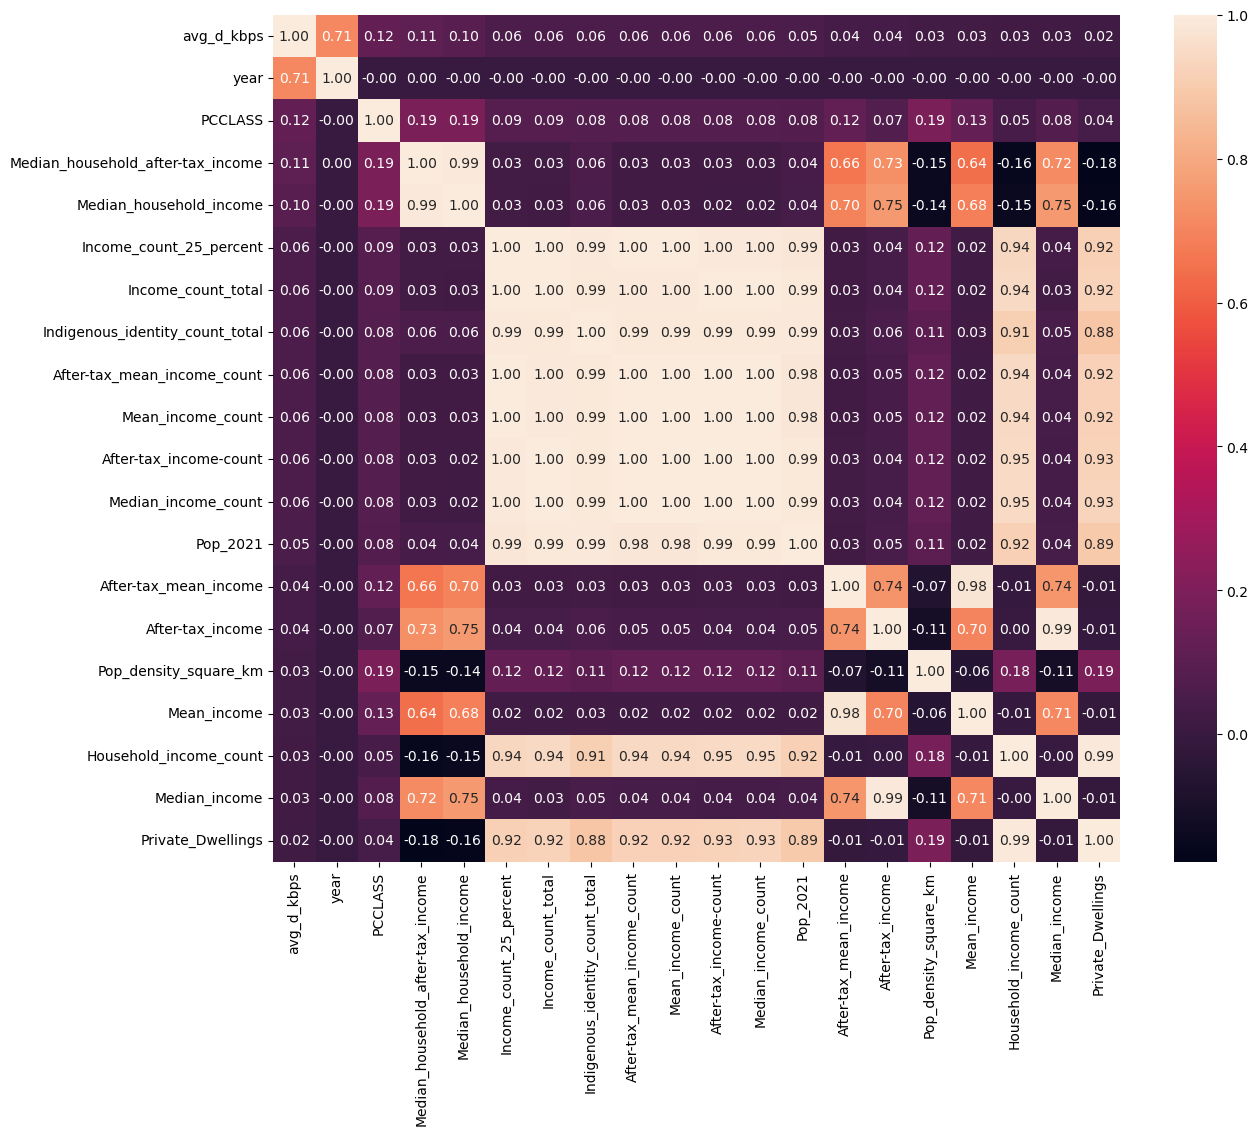

In [25]:
# correaltion analysis
fixed_d = fixed_df.drop(columns=['avg_u_kbps'])
corr_fix = fixed_d.corr()
k = 20
cols = corr_fix.nlargest(k, 'avg_d_kbps')['avg_d_kbps'].index
print(cols)
cm = fixed_d[cols].corr()
f, ax = plt.subplots(figsize=(14, 11))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f')
plt.savefig('heatmap.png')
plt.show()

In [40]:
selected_df = full_data[['PCCLASS','CENSUS_YEAR','Pop_2021','Pop_density_square_km',
                          'Land_area_square_km','Median_income',
                         'Mean_income',
                        'Median_household_income',
                         'year',
                          'quarter', 'conn_type', 'devices','avg_d_kbps','avg_u_kbps']]
# train_data = selected_data['2019-01-01':'2022-12-31']
# test_data = selected_data['2023-01-01':]
fixed_data = selected_df[selected_df['conn_type'] == 'fixed']
fixed_data.drop(columns=['conn_type'], inplace=True)
mobile_data = selected_df[selected_df['conn_type'] == 'mobile']
mobile_data.drop(columns=['conn_type'], inplace=True)

Index(['avg_d_kbps', 'year', 'PCCLASS', 'Median_household_income', 'Pop_2021',
       'Pop_density_square_km', 'Mean_income', 'Median_income', 'devices',
       'quarter', 'Land_area_square_km', 'CENSUS_YEAR'],
      dtype='object')


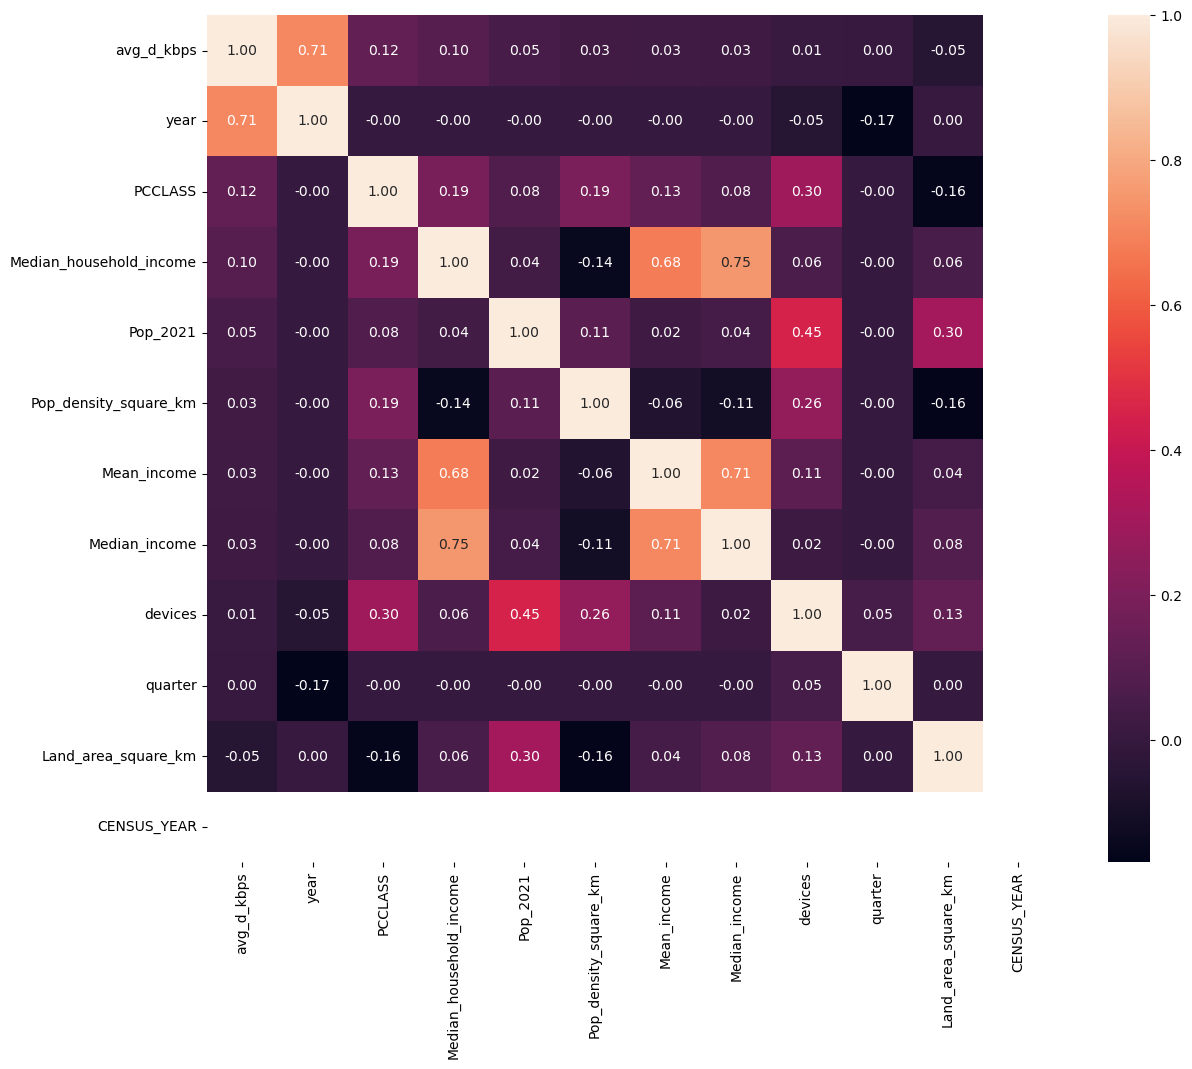

In [41]:
fixed_df = fixed_data.dropna(how='any')
# correaltion analysis
fixed_d = fixed_df.drop(columns=['avg_u_kbps'])
corr_fix = fixed_d.corr()
k = 20
cols = corr_fix.nlargest(k, 'avg_d_kbps')['avg_d_kbps'].index
print(cols)
cm = fixed_d[cols].corr()
f, ax = plt.subplots(figsize=(14, 11))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f')
plt.savefig('heatmap.png')
plt.show()